In [ ]:
# first we connect to the drive to access the data
from google.colab import drive
drive.mount("/content/gdrive") # saving the files after the connection under gdrive directory


Mounted at /content/gdrive


In [ ]:
# importing 
import os
import shutil
import IPython

In [ ]:
!unzip /content/gdrive/MyDrive/computer_vision/leaf_dataset_disease_segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: aug_data/aug_data/images/00411_1.jpg  
  inflating: aug_data/aug_data/images/00411_2.jpg  
  inflating: aug_data/aug_data/images/00411_3.jpg  
  inflating: aug_data/aug_data/images/00411_4.jpg  
  inflating: aug_data/aug_data/images/00412_0.jpg  
  inflating: aug_data/aug_data/images/00412_1.jpg  
  inflating: aug_data/aug_data/images/00412_2.jpg  
  inflating: aug_data/aug_data/images/00412_3.jpg  
  inflating: aug_data/aug_data/images/00412_4.jpg  
  inflating: aug_data/aug_data/images/00413_0.jpg  
  inflating: aug_data/aug_data/images/00413_1.jpg  
  inflating: aug_data/aug_data/images/00413_2.jpg  
  inflating: aug_data/aug_data/images/00413_3.jpg  
  inflating: aug_data/aug_data/images/00413_4.jpg  
  inflating: aug_data/aug_data/images/00414_0.jpg  
  inflating: aug_data/aug_data/images/00414_1.jpg  
  inflating: aug_data/aug_data/images/00414_2.jpg  
  inflating: aug_data/aug_data/images/00414_3.jpg  
  inflating: 

In [ ]:
# data path
images_path = "/content/data/data/images"
masks_path = "/content/data/data/masks"
images_aug_path="/content/aug_data/aug_data/images"
masks_aug_path="/content/aug_data/aug_data/masks"

In [ ]:
# feature extraction
# creating a feature reader for the features that will be extracted from the images
import numpy as np
# creating a function that will save the features to save computational power
def features_reader(file_name, dict_to_be_saved="nothingforeading", state = "r"):
  if ".pkl" not in file_name: 
    file_name = file_name + ".pkl"
  if state == "r":
    with open(file_name, "rb") as file:
      output = np.load(file)
    return output
  elif state == "rd":
    file_name = f"/content/gdrive/MyDrive/computer_vision/{file_name}"
    with open(file_name, "rb") as file:
        output = np.load(file)
    return output
  elif state == "w":
    with open(file_name, "wb") as file:
        np.save(file,dict_to_be_saved)
    print("List have been saved successfully")
  elif state == "wd": # save to the drive
      with open(file_name, "wb") as file:
        np.save(file,dict_to_be_saved)
        shutil.copy(f"/content/{file_name}", f"/content/gdrive/MyDrive/computer_vision/{file_name}")
        print("List have been saved to the drive successfully")
  else:
    print("You are using a wrong state")

In [ ]:
# counting the number of training samples in data and augmentated data
counter = 0
for name in os.listdir(images_path):
  counter += 1
print(f"the number of images in data: {counter}")
counter = 0
for name in os.listdir(masks_path):
  counter += 1
print(f"the number of masks in data: {counter}")
counter = 0
for name in os.listdir(images_aug_path):
  counter +=1
print(f"the number of images in aug_data: {counter}")
counter = 0
for name in os.listdir(masks_aug_path):
  counter +=1
print(f"the number of masks in aug_data: {counter}")

the number of images in data: 588
the number of masks in data: 588
the number of images in aug_data: 2940
the number of masks in aug_data: 2940


In [ ]:
# preparing the data lists to access the files
# first getting the list of images in each path
images_list = []
for name in os.listdir(images_path):
  images_list.append(images_path+"/"+name)
images_list = sorted(images_list)
print(images_list[0:10])
masks_list = []
for name in os.listdir(masks_path):
  masks_list.append(masks_path+"/"+name)
masks_list = sorted(masks_list)
print(masks_list[0:10])
images_aug_list = []
for name in os.listdir(images_aug_path):
  images_aug_list.append(images_aug_path+"/"+name)
images_aug_list = sorted(images_aug_list)
print(images_aug_list[0:10])
masks_aug_list = []
for name in os.listdir(masks_aug_path):
  masks_aug_list.append(masks_aug_path+"/"+name)
masks_aug_list = sorted(masks_aug_list)
print(masks_aug_list[0:10])

['/content/data/data/images/00000.jpg', '/content/data/data/images/00001.jpg', '/content/data/data/images/00002.jpg', '/content/data/data/images/00003.jpg', '/content/data/data/images/00004.jpg', '/content/data/data/images/00005.jpg', '/content/data/data/images/00006.jpg', '/content/data/data/images/00007.jpg', '/content/data/data/images/00008.jpg', '/content/data/data/images/00009.jpg']
['/content/data/data/masks/00000.png', '/content/data/data/masks/00001.png', '/content/data/data/masks/00002.png', '/content/data/data/masks/00003.png', '/content/data/data/masks/00004.png', '/content/data/data/masks/00005.png', '/content/data/data/masks/00006.png', '/content/data/data/masks/00007.png', '/content/data/data/masks/00008.png', '/content/data/data/masks/00009.png']
['/content/aug_data/aug_data/images/00000_0.jpg', '/content/aug_data/aug_data/images/00000_1.jpg', '/content/aug_data/aug_data/images/00000_2.jpg', '/content/aug_data/aug_data/images/00000_3.jpg', '/content/aug_data/aug_data/ima

In [ ]:
# import pandas as pd
# from sklearn.cluster import MeanShift, estimate_bandwidth
# from sklearn.preprocessing import MinMaxScaler
# def recreate_image(codebook, labels, w, h):
#     """Recreate the (compressed) image from the code book & labels"""
#     return codebook[labels].reshape(w, h, -1)
# # meanshift image
# def convert_meanshift(image):
#   width = image.shape[0]
#   height = image.shape[1]
#   index = pd.MultiIndex.from_product(
#     (*map(range, image.shape[:2]), ('r', 'g', 'b')),
#     names=('row', 'col', None))
#   df = pd.Series(image.flatten(), index=index)
#   df = df.unstack()
#   df = df.reset_index().reindex(columns=['col','row',   'r','g','b'])
#   df_rgb = df[['r', 'g', 'b']]
#   nd_2 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_rgb)
#   bandwidth_2 = estimate_bandwidth(nd_2, quantile=.04, n_jobs=-1)
#   ms_2 = MeanShift(bandwidth = bandwidth_2 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_2)
#   return recreate_image(ms_2.cluster_centers_, ms_2.labels_, width, height)


In [ ]:
# working on a R-Unet model preprocessing


In [ ]:
# building a model to remove background from leaf images

In [ ]:
# imports
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
# setting the data that will be used so i can change it later if i wanted
train_data_x = images_aug_list
train_data_y = masks_aug_list
# setting the x and y
image_size = 256
x_train = np.zeros((len(train_data_x),image_size, image_size, 3),dtype=np.uint8)
y_train = np.zeros((len(train_data_y),128, 128, 1),dtype=bool)
# preparing the data for training
# image = imread(train_data_y[0])[:,:,0]
# print(image.shape)
# imshow(image)
for num in range(len(x_train)):
  # getting the image path from the list that i have created
  x_image_path = train_data_x[num]
  #y_image_path = train_data_y[num]
  # first we get the image using imread
  image_x = imread(x_image_path)[:,:,:3] # using 3 to limit the channels to 3
  #image_y = imread(y_image_path)[:,:] # remove the zero when working with aug data
  # resizing the image to be in 128, 128 shape
  image_x = resize(image_x, (image_size,image_size), mode="constant", preserve_range = True) # 
  #image_y = resize(image_y, (128,128), mode="constant", preserve_range = True) #
  x_train[num] = image_x
  #y_train[num] = np.expand_dims(image_y, axis=-1) # 

In [ ]:
# saving the features of the image_size == 256
x_train_256 = features_reader("x_train_aug_256", x_train, state="wd")

List have been saved to the drive successfully


In [ ]:
# loading the features and labels 
x_train_256 = features_reader("x_train_aug_256",state="rd")
x_train = features_reader("x_train_aug", state = "rd")
y_train = features_reader("y_train_aug", state = "rd")

Text(0.5, 1.0, 'Mask')

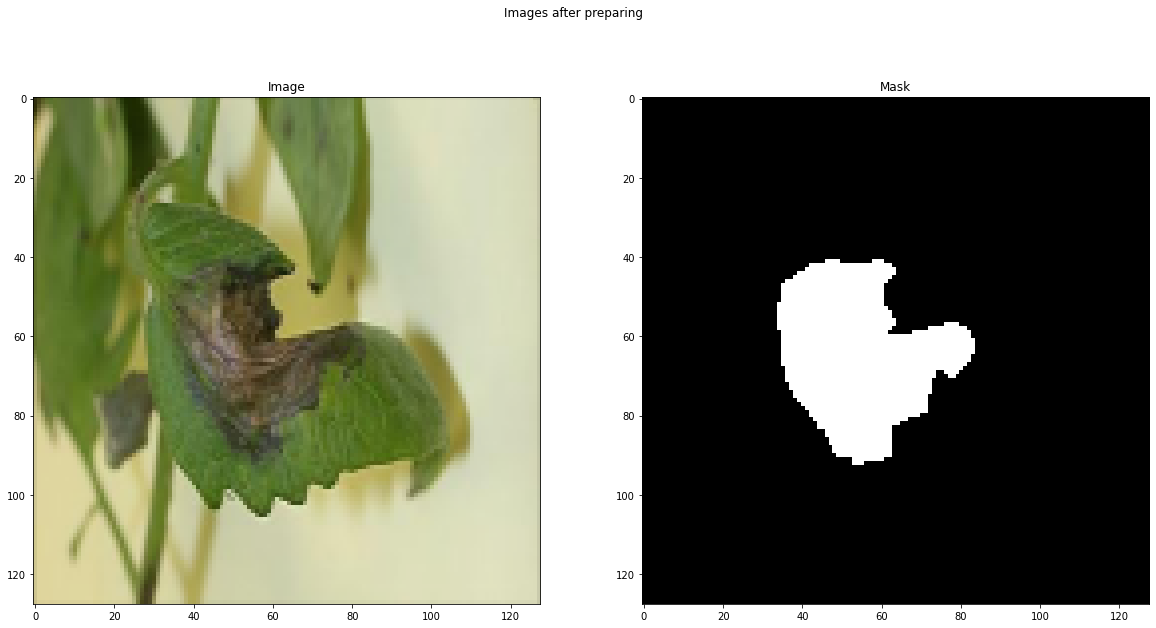

In [ ]:
# showing the bool array as binary image
counter = 0
image_num = 101
#image = imread(train_data_y[image_num])[:,:,0]
def recreate_image(instancelist, image_num):
  test = np.zeros((128,128), dtype=np.uint8)
  for x in range(128):
    for y in range(128):
      if instancelist[image_num][x,y] == True:
          test[x,y] = 255
      else:
          test[x,y] = 0
  return test
test = recreate_image(y_train, image_num)
fig = plt.figure(figsize=(20,10))
fig.suptitle("Images after preparing")
fig.add_subplot(1, 2, 1)
# showing the image before range compression
plt.imshow(x_train[image_num])
plt.title("Image")
# showing the image after range compression
fig.add_subplot(1, 2, 2)
plt.imshow(test, cmap="gray")
plt.title("Mask")


In [ ]:
# saving x_train and y_train run only to save the data
features_test = features_reader("x_train_aug_hsv",x_train, state = "wd")
features_test = features_reader("y_train_aug",y_train, state = "wd")

List have been saved to the drive successfully
List have been saved to the drive successfully


In [ ]:
# Showing the structure of the U-Net
from IPython.display import Image, display
architecture_img = Image("/content/gdrive/MyDrive/computer_vision/architucture.png")
display(architecture_img)

In [ ]:
# buidling the U-Net Model with batch normalization before and after dropout in the first part and after dropout in the second part
import keras as k
import tensorflow as tf
from keras.layers import LeakyReLU

# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
# scaling the input
scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.BatchNormalization()(C1)
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
P1 = k.layers.BatchNormalization()(P1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation ="relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.BatchNormalization()(C2)
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
P2 = k.layers.BatchNormalization()(P2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.BatchNormalization()(C3)
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
P3 = k.layers.BatchNormalization()(P3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.BatchNormalization()(C4)
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
P4 = k.layers.BatchNormalization()(P4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
C5 = k.layers.BatchNormalization()(C5)
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4])
C6 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.BatchNormalization()(C6)
C6 = k.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
C7 = k.layers.concatenate([U7, C3])
C7 = k.layers.Conv2D(64, (3,3), activation ="relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.BatchNormalization()(C7)
C7 = k.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
C8 = k.layers.concatenate([U8, C2])
C8 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.BatchNormalization()(C8)
C8 = k.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
C9 = k.layers.concatenate([U9, C1])
C9 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.BatchNormalization()(C9)
C9 = k.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
# output layer
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C9)
model = k.Model(inputs=[inputslayer], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
# buidling the U-Net Model with batch normalization after the dropout
import keras as k
import tensorflow as tf
from keras.layers import LeakyReLU

# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
# scaling the input
scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
P1 = k.layers.BatchNormalization()(P1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
P2 = k.layers.BatchNormalization()(P2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  

#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
P3 = k.layers.BatchNormalization()(P3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
P4 = k.layers.BatchNormalization()(P4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
C5 = k.layers.BatchNormalization()(C5)
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4])
C6 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.BatchNormalization()(C6)
C6 = k.layers.Conv2D(128, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
C7 = k.layers.concatenate([U7, C3])
C7 = k.layers.Conv2D(64, (3,3), activation =LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.BatchNormalization()(C7)
C7 = k.layers.Conv2D(64, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
C8 = k.layers.concatenate([U8, C2])
C8 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.BatchNormalization()(C8)
C8 = k.layers.Conv2D(32, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
C9 = k.layers.concatenate([U9, C1])
C9 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.BatchNormalization()(C9)
C9 = k.layers.Conv2D(16, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
# output layer
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C9)
model = k.Model(inputs=[inputslayer], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", k.metrics.MeanIoU(num_classes=2)])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [ ]:
import keras as k
import tensorflow as tf
from keras.layers import LeakyReLU

# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
# scaling the input
scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
P1 = k.layers.BatchNormalization()(P1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
P2 = k.layers.BatchNormalization()(P2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  

#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
P3 = k.layers.BatchNormalization()(P3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3), activation ="relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
P4 = k.layers.BatchNormalization()(P4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
C5 = k.layers.BatchNormalization()(C5)
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4])
C6 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.BatchNormalization()(C6)
C6 = k.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
C7 = k.layers.concatenate([U7, C3])
C7 = k.layers.Conv2D(64, (3,3), activation ="relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.BatchNormalization()(C7)
C7 = k.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
C8 = k.layers.concatenate([U8, C2])
C8 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.BatchNormalization()(C8)
C8 = k.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
C9 = k.layers.concatenate([U9, C1])
C9 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.BatchNormalization()(C9)
C9 = k.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
# output layer
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C9)
model = k.Model(inputs=[inputslayer], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
# buidling the U-Net Model with batch normalization before the dropout
import keras as k
import tensorflow as tf
from keras.layers import LeakyReLU

# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
# scaling the input
scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.BatchNormalization()(C1)
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.BatchNormalization()(C2)
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.BatchNormalization()(C3)
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.BatchNormalization()(C4)
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.BatchNormalization()(C5)
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4])
C6 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.BatchNormalization()(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.Conv2D(128, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
C7 = k.layers.concatenate([U7, C3])
C7 = k.layers.Conv2D(64, (3,3), activation =LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.BatchNormalization()(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.Conv2D(64, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
C8 = k.layers.concatenate([U8, C2])
C8 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.BatchNormalization()(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.Conv2D(32, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
C9 = k.layers.concatenate([U9, C1])
C9 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.BatchNormalization()(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.Conv2D(16, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
# output layer
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C9)
model = k.Model(inputs=[inputslayer], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
# buidling the OX-Net Model
import keras as k
import tensorflow as tf

# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
# scaling the input
scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4])
C6 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
U4 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C4)
C7 = k.layers.concatenate([U7, C3, U4])
C7 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
U3 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C3)
C8 = k.layers.concatenate([U8, C2, U3])
C8 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
U2 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C2)
C9 = k.layers.concatenate([U9, C1, U2])
C9 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
#first part C1
C1c = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1c = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
C1c = k.layers.Dropout(0.2)(C1c) # to pervent overfitting
P1c = k.layers.MaxPooling2D((2,2))(C1c)
# first part C2
C2c = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1c) # 32 filters 3x3 kernal
C2c = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
C2c = k.layers.Dropout(0.25)(C2c) # to pervent overfitting
P2c = k.layers.MaxPooling2D((2,2))(C2c)
# first part C3
C3c = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2c) # 64 filters 3x3 kernal
C3c = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3c) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3c = k.layers.Dropout(0.25)(C3c) # to pervent overfitting
P3c = k.layers.MaxPooling2D((2,2))(C3c)
# first part C4
C4c = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3c) # 128 filters 3x3 kernal
C4c = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4c) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4c = k.layers.Dropout(0.3)(C4c) # to pervent overfitting
P4c = k.layers.MaxPooling2D((2,2))(C4c)
# first part C5
C5c = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4c) # 256 filters 3x3 kernal
C5c = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5c) # 256 filters 3x3 kernal  
C5c = k.layers.Dropout(0.25)(C5c) # to pervent overfitting
# second part C6
U6c = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5c)
C6c = k.layers.concatenate([U6c, C4c])
C6c = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
C6c = k.layers.Dropout(0.3)(C6c)
C6c = k.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
# second part C7
U7c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6c)
U4c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C4c)
C7c = k.layers.concatenate([U7c, C3c, U4c])
#C7c = k.layers.concatenate([U7c, C3c])
C7c = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
C7c = k.layers.Dropout(0.25)(C7c)
C7c = k.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
# second part C8
U8c = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7c)
U3c = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C3c)
C8c = k.layers.concatenate([U8c, C2c, U3c])
C8c = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
C8c = k.layers.Dropout(0.25)(C8c)
C8c = k.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
# second part C9
U9c = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8c)
U2c = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C2c)
C9c = k.layers.concatenate([U9c, C1c, U2c])
C9c = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
C9c = k.layers.Dropout(0.2)(C9c)
C9c = k.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
# output layer
C10 = k.layers.concatenate([C9, C9c])
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C10)
model = k.Model(inputs=[inputslayer], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
# buidling the O-Net Model
import keras as k
import tensorflow as tf

# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
# scaling the input
scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4])
C6 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
C7 = k.layers.concatenate([U7, C3])
C7 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
C8 = k.layers.concatenate([U8, C2])
C8 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
C9 = k.layers.concatenate([U9, C1])
C9 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
#first part C1
C1c = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1c = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
C1c = k.layers.Dropout(0.2)(C1c) # to pervent overfitting
P1c = k.layers.MaxPooling2D((2,2))(C1c)
# first part C2
C2c = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1c) # 32 filters 3x3 kernal
C2c = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
C2c = k.layers.Dropout(0.25)(C2c) # to pervent overfitting
P2c = k.layers.MaxPooling2D((2,2))(C2c)
# first part C3
C3c = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2c) # 64 filters 3x3 kernal
C3c = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3c) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3c = k.layers.Dropout(0.25)(C3c) # to pervent overfitting
P3c = k.layers.MaxPooling2D((2,2))(C3c)
# first part C4
C4c = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3c) # 128 filters 3x3 kernal
C4c = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4c) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4c = k.layers.Dropout(0.3)(C4c) # to pervent overfitting
P4c = k.layers.MaxPooling2D((2,2))(C4c)
# first part C5
C5c = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4c) # 256 filters 3x3 kernal
C5c = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5c) # 256 filters 3x3 kernal  
C5c = k.layers.Dropout(0.25)(C5c) # to pervent overfitting
# second part C6
U6c = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5c)
C6c = k.layers.concatenate([U6c, C4c])
C6c = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
C6c = k.layers.Dropout(0.3)(C6c)
C6c = k.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
# second part C7
U7c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6c)
C7c = k.layers.concatenate([U7c, C3c])
C7c = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
C7c = k.layers.Dropout(0.25)(C7c)
C7c = k.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
# second part C8
U8c = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7c)
C8c = k.layers.concatenate([U8c, C2c])
C8c = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
C8c = k.layers.Dropout(0.25)(C8c)
C8c = k.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
# second part C9
U9c = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8c)
C9c = k.layers.concatenate([U9c, C1c])
C9c = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
C9c = k.layers.Dropout(0.2)(C9c)
C9c = k.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
# output layer
C10 = k.layers.concatenate([C9, C9c])
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C10)
model = k.Model(inputs=[inputslayer], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
# buidling the O-Net with 3x3 down side and 5x5 up side Model \/
import keras as k
import tensorflow as tf

# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
# scaling the input
scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
#first part C1
C1c = k.layers.Conv2D(16, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1c = k.layers.Conv2D(16, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
C1c = k.layers.Dropout(0.2)(C1c) # to pervent overfitting
P1c = k.layers.MaxPooling2D((2,2))(C1c)
# first part C2
C2c = k.layers.Conv2D(32, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1c) # 32 filters 3x3 kernal
C2c = k.layers.Conv2D(32, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
C2c = k.layers.Dropout(0.25)(C2c) # to pervent overfitting
P2c = k.layers.MaxPooling2D((2,2))(C2c)
# first part C3
C3c = k.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2c) # 64 filters 3x3 kernal
C3c = k.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3c) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3c = k.layers.Dropout(0.25)(C3c) # to pervent overfitting
P3c = k.layers.MaxPooling2D((2,2))(C3c)
# first part C4
C4c = k.layers.Conv2D(128, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3c) # 128 filters 3x3 kernal
C4c = k.layers.Conv2D(128, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4c) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4c = k.layers.Dropout(0.3)(C4c) # to pervent overfitting
P4c = k.layers.MaxPooling2D((2,2))(C4c)
# first part C5
C5c = k.layers.Conv2D(256, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4c) # 256 filters 3x3 kernal
C5c = k.layers.Conv2D(256, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5c) # 256 filters 3x3 kernal  
C5c = k.layers.Dropout(0.25)(C5c) # to pervent overfitting
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4, C4c])
C6 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
U4 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C4)
C7 = k.layers.concatenate([U7, C3, C3c, U4])
C7 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
U3 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C3)
C8 = k.layers.concatenate([U8, C2, C2c, U3])
C8 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
U2 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C2)
C9 = k.layers.concatenate([U9, C1, C1c, U2])
C9 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
# second part C6
U6c = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5c)
C6c = k.layers.concatenate([U6c, C4c, C4])
C6c = k.layers.Conv2D(128, (5,5), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
C6c = k.layers.Dropout(0.3)(C6c)
C6c = k.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
# second part C7
U7c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6c)
U4c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C4c)
C7c = k.layers.concatenate([U7c, C3c, C3, U4c])
C7c = k.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
C7c = k.layers.Dropout(0.25)(C7c)
C7c = k.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
# second part C8
U8c = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7c)
U3c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C3c)
C8c = k.layers.concatenate([U8c, C2c, C2, U3c])
C8c = k.layers.Conv2D(32, (5,5), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
C8c = k.layers.Dropout(0.25)(C8c)
C8c = k.layers.Conv2D(32, (5,5), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
# second part C9
U9c = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8c)
U2c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C2c)
C9c = k.layers.concatenate([U9c, C1c, C1, U2c])
C9c = k.layers.Conv2D(16, (5,5), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
C9c = k.layers.Dropout(0.2)(C9c)
C9c = k.layers.Conv2D(16, (5,5), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
# output layer
C10 = k.layers.concatenate([C9, C9c])
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C10)
model = k.Model(inputs=[inputslayer], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
# buidling the O-Net with 3x3 down side and 5x5 up side Model \/ with batch normalization after dropout
import keras as k
import tensorflow as tf
from keras.layers import LeakyReLU
# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
# scaling the input
scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation =LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
P1 = k.layers.BatchNormalization()(P1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
P2 = k.layers.BatchNormalization()(P2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
P3 = k.layers.BatchNormalization()(P3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
P4 = k.layers.BatchNormalization()(P4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
#first part C1
C1c = k.layers.Conv2D(16, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1c = k.layers.Conv2D(16, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
C1c = k.layers.Dropout(0.2)(C1c) # to pervent overfitting
P1c = k.layers.MaxPooling2D((2,2))(C1c)
P1c = k.layers.BatchNormalization()(P1c)
# first part C2
C2c = k.layers.Conv2D(32, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1c) # 32 filters 3x3 kernal
C2c = k.layers.Conv2D(32, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
C2c = k.layers.Dropout(0.25)(C2c) # to pervent overfitting
P2c = k.layers.MaxPooling2D((2,2))(C2c)
P2c = k.layers.BatchNormalization()(P2c)
# first part C3
C3c = k.layers.Conv2D(64, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2c) # 64 filters 3x3 kernal
C3c = k.layers.Conv2D(64, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3c) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3c = k.layers.Dropout(0.25)(C3c) # to pervent overfitting
P3c = k.layers.MaxPooling2D((2,2))(C3c)
P3c = k.layers.BatchNormalization()(P3c)
# first part C4
C4c = k.layers.Conv2D(128, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3c) # 128 filters 3x3 kernal
C4c = k.layers.Conv2D(128, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4c) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4c = k.layers.Dropout(0.3)(C4c) # to pervent overfitting
P4c = k.layers.MaxPooling2D((2,2))(C4c)
P4c = k.layers.BatchNormalization()(P4c)
# first part C5
C5c = k.layers.Conv2D(256, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4c) # 256 filters 3x3 kernal
C5c = k.layers.Conv2D(256, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5c) # 256 filters 3x3 kernal  
C5c = k.layers.Dropout(0.25)(C5c) # to pervent overfitting
#P1 = k.layers.BatchNormalization()(P1)
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4, C4c])
C6 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.BatchNormalization()(C6)
C6 = k.layers.Conv2D(128, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
U4 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C4)
C7 = k.layers.concatenate([U7, C3, C3c, U4])
C7 = k.layers.Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.BatchNormalization()(C7)
C7 = k.layers.Conv2D(64, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
U3 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C3)
C8 = k.layers.concatenate([U8, C2, C2c, U3])
C8 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.BatchNormalization()(C8)
C8 = k.layers.Conv2D(32, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
U2 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C2)
C9 = k.layers.concatenate([U9, C1, C1c, U2])
C9 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.BatchNormalization()(C9)
C9 = k.layers.Conv2D(16, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
# second part C6
U6c = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5c)
C6c = k.layers.concatenate([U6c, C4c, C4])
C6c = k.layers.Conv2D(128, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
C6c = k.layers.Dropout(0.3)(C6c)
C6c = k.layers.BatchNormalization()(C6c)
C6c = k.layers.Conv2D(128, (5,5), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
# second part C7
U7c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6c)
U4c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C4c)
C7c = k.layers.concatenate([U7c, C3c, C3, U4c])
C7c = k.layers.Conv2D(64, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
C7c = k.layers.Dropout(0.25)(C7c)
C7c = k.layers.BatchNormalization()(C7c)
C7c = k.layers.Conv2D(64, (5,5), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
# second part C8
U8c = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7c)
U3c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C3c)
C8c = k.layers.concatenate([U8c, C2c, C2, U3c])
C8c = k.layers.Conv2D(32, (5,5), activation =LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
C8c = k.layers.Dropout(0.25)(C8c)
C8c = k.layers.BatchNormalization()(C8c)
C8c = k.layers.Conv2D(32, (5,5), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
# second part C9
U9c = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8c)
U2c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C2c)
C9c = k.layers.concatenate([U9c, C1c, C1, U2c])
C9c = k.layers.Conv2D(16, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
C9c = k.layers.Dropout(0.2)(C9c)
C9c = k.layers.BatchNormalization()(C9c)
C9c = k.layers.Conv2D(16, (5,5), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
# output layer
C10 = k.layers.concatenate([C9, C9c])
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C10)
model = k.Model(inputs=[inputslayer], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
# buidling the O-Net with 3x3 down side and 5x5 up side Model \\
import keras as k
import tensorflow as tf

# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
# scaling the input
scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
#first part C1
C1c = k.layers.Conv2D(16, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1c = k.layers.Conv2D(16, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
C1c = k.layers.Dropout(0.2)(C1c) # to pervent overfitting
P1c = k.layers.MaxPooling2D((2,2))(C1c)
# first part C2
C2c = k.layers.Conv2D(32, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1c) # 32 filters 3x3 kernal
C2c = k.layers.Conv2D(32, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
C2c = k.layers.Dropout(0.25)(C2c) # to pervent overfitting
P2c = k.layers.MaxPooling2D((2,2))(C2c)
# first part C3
C3c = k.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2c) # 64 filters 3x3 kernal
C3c = k.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3c) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3c = k.layers.Dropout(0.25)(C3c) # to pervent overfitting
P3c = k.layers.MaxPooling2D((2,2))(C3c)
# first part C4
C4c = k.layers.Conv2D(128, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3c) # 128 filters 3x3 kernal
C4c = k.layers.Conv2D(128, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4c) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4c = k.layers.Dropout(0.3)(C4c) # to pervent overfitting
P4c = k.layers.MaxPooling2D((2,2))(C4c)
# first part C5
C5c = k.layers.Conv2D(256, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4c) # 256 filters 3x3 kernal
C5c = k.layers.Conv2D(256, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5c) # 256 filters 3x3 kernal  
C5c = k.layers.Dropout(0.25)(C5c) # to pervent overfitting
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4, C4c])
C6 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
C7 = k.layers.concatenate([U7, C3, C3c])
C7 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
C8 = k.layers.concatenate([U8, C2, C2c])
C8 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
C9 = k.layers.concatenate([U9, C1, C1c])
C9 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
# second part C6
U6c = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5c)
C6c = k.layers.concatenate([U6c, C4c, C4])
C6c = k.layers.Conv2D(128, (5,5), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
C6c = k.layers.Dropout(0.3)(C6c)
C6c = k.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
# second part C7
U7c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6c)
C7c = k.layers.concatenate([U7c, C3c, C3])
C7c = k.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
C7c = k.layers.Dropout(0.25)(C7c)
C7c = k.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
# second part C8
U8c = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7c)
C8c = k.layers.concatenate([U8c, C2c, C2])
C8c = k.layers.Conv2D(32, (5,5), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
C8c = k.layers.Dropout(0.25)(C8c)
C8c = k.layers.Conv2D(32, (5,5), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
# second part C9
U9c = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8c)
C9c = k.layers.concatenate([U9c, C1c, C1])
C9c = k.layers.Conv2D(16, (5,5), activation = "relu", kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
C9c = k.layers.Dropout(0.2)(C9c)
C9c = k.layers.Conv2D(16, (5,5), activation='relu', kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
# output layer
C10 = k.layers.concatenate([C9, C9c])
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C10)
model = k.Model(inputs=[inputslayer], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
# buidling the O-Net with 3x3 down side and 5x5 up side Model \/
import keras as k
import tensorflow as tf
from keras.layers import LeakyReLU

# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
inputslayer2 = k.layers.Input((256,256,3))
# scaling the input
#scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
scalled = k.layers.BatchNormalization()(inputslayer)
scalled2 = k.layers.BatchNormalization()(inputslayer2)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
P1 = k.layers.BatchNormalization()(P1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
P2 = k.layers.BatchNormalization()(P2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
P3 = k.layers.BatchNormalization()(P3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
P4 = k.layers.BatchNormalization()(P4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
#first part C1
C1c = k.layers.Conv2D(16, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled2) # 16 filters 3x3 kernal
C1c = k.layers.Conv2D(16, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
C1c = k.layers.Dropout(0.2)(C1c) # to pervent overfitting
P1c = k.layers.MaxPooling2D((2,2))(C1c)
P1c = k.layers.BatchNormalization()(P1c)
# first part C2
C2c = k.layers.Conv2D(32, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1c) # 32 filters 3x3 kernal
C2c = k.layers.Conv2D(32, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
C2c = k.layers.Dropout(0.25)(C2c) # to pervent overfitting
P2c = k.layers.MaxPooling2D((2,2))(C2c)
P2c = k.layers.BatchNormalization()(P2c)
# first part C3
C3c = k.layers.Conv2D(64, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2c) # 64 filters 3x3 kernal
C3c = k.layers.Conv2D(64, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3c) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3c = k.layers.Dropout(0.25)(C3c) # to pervent overfitting
P3c = k.layers.MaxPooling2D((2,2))(C3c)
P3c = k.layers.BatchNormalization()(P3c)
# first part C4
C4c = k.layers.Conv2D(128, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3c) # 128 filters 3x3 kernal
C4c = k.layers.Conv2D(128, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4c) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4c = k.layers.Dropout(0.3)(C4c) # to pervent overfitting
P4c = k.layers.MaxPooling2D((2,2))(C4c)
P4c = k.layers.BatchNormalization()(P4c)
# first part C5
C5c = k.layers.Conv2D(256, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4c) # 256 filters 3x3 kernal
C5c = k.layers.Conv2D(256, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5c) # 256 filters 3x3 kernal  
C5c = k.layers.Dropout(0.25)(C5c) # to pervent overfitting
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4])
C6 = k.layers.Conv2D(128, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.Conv2D(128, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
U4 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C4)
C7 = k.layers.concatenate([U7, C3])
C7 = k.layers.Conv2D(64, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.Conv2D(64, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
U3 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C3)
C8 = k.layers.concatenate([U8, C2])
C8 = k.layers.Conv2D(32, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.Conv2D(32, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
U2 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C2)
C9 = k.layers.concatenate([U9, C1])
C9 = k.layers.Conv2D(16, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.Conv2D(16, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
# second part C6
U6c = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5c)
C6c = k.layers.concatenate([U6c, C4c])
C6c = k.layers.Conv2D(128, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
C6c = k.layers.Dropout(0.3)(C6c)
C6c = k.layers.Conv2D(128, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
# second part C7
U7c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6c)
U4c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C4c)
C7c = k.layers.concatenate([U7c, C3c])
C7c = k.layers.Conv2D(64, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
C7c = k.layers.Dropout(0.25)(C7c)
C7c = k.layers.Conv2D(64, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
# second part C8
U8c = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7c)
U3c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C3c)
C8c = k.layers.concatenate([U8c, C2c])
C8c = k.layers.Conv2D(32, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
C8c = k.layers.Dropout(0.25)(C8c)
C8c = k.layers.Conv2D(32, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
# second part C9
U9c = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8c)
U2c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C2c)
C9c = k.layers.concatenate([U9c, C1c]) 
C9c = k.layers.Conv2D(16, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
C9c = k.layers.Dropout(0.2)(C9c)
C9c = k.layers.Conv2D(16, (3,3),  activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
C9c = k.layers.MaxPool2D((2,2))(C9c)
C9c = k.layers.BatchNormalization()(C9c)
# output layer
C10 = k.layers.concatenate([C9, C9c])
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C10)
model = k.Model(inputs=[inputslayer,inputslayer2], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_86 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization_148 (Batch  (None, 256, 256, 3)  12         ['input_86[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 input_85 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                         

In [ ]:
# buidling the O-Net with 3x3 down side and 5x5 up side Model \/ currentthing
import keras as k
import tensorflow as tf
from keras.layers import LeakyReLU
# defining the input layer
inputslayer =  k.layers.Input((128,128,3))
inputslayer2 = k.layers.Input((256,256,3))
# scaling the input
#scalled = k.layers.Lambda(lambda value : value/255)(inputslayer)
scalled = k.layers.BatchNormalization()(inputslayer)
scalled2 = k.layers.BatchNormalization()(inputslayer2)
# implementing the architecture layers
# tf.contrib.layers.xavier_initializer(uniform=False)
# first part C1
C1 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled) # 16 filters 3x3 kernal
C1 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1) # 16 filters 3x3 kernal  
C1 = k.layers.Dropout(0.2)(C1) # to pervent overfitting
P1 = k.layers.MaxPooling2D((2,2))(C1)
P1 = k.layers.BatchNormalization()(P1)
# first part C2
C2 = k.layers.Conv2D(32, (3,3), activation =LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1) # 32 filters 3x3 kernal
C2 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2) # 32 filters 3x3 kernal  
C2 = k.layers.Dropout(0.25)(C2) # to pervent overfitting
P2 = k.layers.MaxPooling2D((2,2))(C2)
P2 = k.layers.BatchNormalization()(P2)
# first part C3
C3 = k.layers.Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2) # 64 filters 3x3 kernal
C3 = k.layers.Conv2D(64, (3,3), activation =LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3 = k.layers.Dropout(0.25)(C3) # to pervent overfitting
P3 = k.layers.MaxPooling2D((2,2))(C3)
P3 = k.layers.BatchNormalization()(P3)
# first part C4
C4 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3) # 128 filters 3x3 kernal
C4 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4 = k.layers.Dropout(0.3)(C4) # to pervent overfitting
P4 = k.layers.MaxPooling2D((2,2))(C4)
P4 = k.layers.BatchNormalization()(P4)
# first part C5
C5 = k.layers.Conv2D(256, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4) # 256 filters 3x3 kernal
C5 = k.layers.Conv2D(256, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5) # 256 filters 3x3 kernal  
C5 = k.layers.Dropout(0.25)(C5) # to pervent overfitting
#first part C1
C1c = k.layers.Conv2D(16, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(scalled2) # 16 filters 3x3 kernal
C1c = k.layers.Conv2D(16, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
#C1 = k.layers.Conv2D(16, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C1c) # 16 filters 3x3 kernal  
C1c = k.layers.Dropout(0.2)(C1c) # to pervent overfitting
P1c = k.layers.MaxPooling2D((2,2))(C1c)
P1c = k.layers.BatchNormalization()(P1c)
# first part C2
C2c = k.layers.Conv2D(32, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P1c) # 32 filters 3x3 kernal
C2c = k.layers.Conv2D(32, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
#C2 = k.layers.Conv2D(32, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C2c) # 32 filters 3x3 kernal  
C2c = k.layers.Dropout(0.25)(C2c) # to pervent overfitting
P2c = k.layers.MaxPooling2D((2,2))(C2c)
P2c = k.layers.BatchNormalization()(P2c)
# first part C3
C3c = k.layers.Conv2D(64, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P2c) # 64 filters 3x3 kernal
C3c = k.layers.Conv2D(64, (5,5), activation =LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3c) # 64 filters 3x3 kernal  
#C3 = k.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C3) # 64 filters 3x3 kernal  
C3c = k.layers.Dropout(0.25)(C3c) # to pervent overfitting
P3c = k.layers.MaxPooling2D((2,2))(C3c)
P3c = k.layers.BatchNormalization()(P3c)
# first part C4
C4c = k.layers.Conv2D(128, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P3c) # 128 filters 3x3 kernal
C4c = k.layers.Conv2D(128, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4c) # 128 filters 3x3 kernal  
#C4 = k.layers.Conv2D(128, (5,5), activation = "relu", kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C4) # 128 filters 3x3 kernal  
C4c = k.layers.Dropout(0.3)(C4c) # to pervent overfitting
P4c = k.layers.MaxPooling2D((2,2))(C4c)
P4c = k.layers.BatchNormalization()(P4c)
# first part C5
C5c = k.layers.Conv2D(256, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(P4c) # 256 filters 3x3 kernal
C5c = k.layers.Conv2D(256, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer = tf.initializers.GlorotUniform(), padding="same")(C5c) # 256 filters 3x3 kernal  
C5c = k.layers.Dropout(0.25)(C5c) # to pervent overfitting
# second part C6
U6 = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5)
C6 = k.layers.concatenate([U6, C4])
C6 = k.layers.Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
C6 = k.layers.Dropout(0.3)(C6)
C6 = k.layers.Conv2D(128, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6)
# second part C7
U7 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6)
U4 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C4)
C7 = k.layers.concatenate([U7, C3])
C7 = k.layers.Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
C7 = k.layers.Dropout(0.25)(C7)
C7 = k.layers.Conv2D(64, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7)
# second part C8
U8 = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7)
U3 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C3)
C8 = k.layers.concatenate([U8, C2])
C8 = k.layers.Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
C8 = k.layers.Dropout(0.25)(C8)
C8 = k.layers.Conv2D(32, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8)
# second part C9
U9 = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8)
U2 = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C2)
C9 = k.layers.concatenate([U9, C1])
C9 = k.layers.Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
C9 = k.layers.Dropout(0.2)(C9)
C9 = k.layers.Conv2D(16, (3,3), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9)
# second part C6
U6c = k.layers.Conv2DTranspose(128, (2,2), strides=(2, 2), padding="same")(C5c)
C6c = k.layers.concatenate([U6c, C4c])
C6c = k.layers.Conv2D(128, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
C6c = k.layers.Dropout(0.3)(C6c)
C6c = k.layers.Conv2D(128, (5,5), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C6c)
# second part C7
U7c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C6c)
U4c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C4c)
C7c = k.layers.concatenate([U7c, C3c])
C7c = k.layers.Conv2D(64, (5,5), activation =LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
C7c = k.layers.Dropout(0.25)(C7c)
C7c = k.layers.Conv2D(64, (5,5), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C7c)
# second part C8
U8c = k.layers.Conv2DTranspose(32, (2,2), strides=(2, 2), padding="same")(C7c)
U3c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C3c)
C8c = k.layers.concatenate([U8c, C2c])
C8c = k.layers.Conv2D(32, (5,5), activation =LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
C8c = k.layers.Dropout(0.25)(C8c)
C8c = k.layers.Conv2D(32, (5,5), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C8c)
# second part C9
U9c = k.layers.Conv2DTranspose(16, (2,2), strides=(2, 2), padding="same")(C8c)
U2c = k.layers.Conv2DTranspose(64, (2,2), strides=(2, 2), padding="same")(C2c)
C9c = k.layers.concatenate([U9c, C1c])
C9c = k.layers.Conv2D(16, (5,5), activation = LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
C9c = k.layers.Dropout(0.2)(C9c)
C9c = k.layers.Conv2D(16, (5,5), activation=LeakyReLU(alpha=0.01), kernel_initializer=tf.initializers.GlorotUniform(), padding="same")(C9c)
# output layer
C10 = k.layers.concatenate([C9, C9c])
outputslayer = k.layers.Conv2D(1,(1,1), activation="sigmoid",padding="same")(C10)
model = k.Model(inputs=[inputslayer, inputslayer2], outputs=[outputslayer])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

ValueError: ignored

In [ ]:
# loading model 
from keras.models import load_model
drive_path = "/content/gdrive/MyDrive/computer_vision/"
model = load_model(drive_path+"disease_segment_unet_aug_modifO_acc90_loss2.276.h5")

In [ ]:
import keras as k
# path for drive
drive_path = "/content/gdrive/MyDrive/computer_vision/"
# training the model 
checkpointer = k.callbacks.ModelCheckpoint(drive_path+"disease_segment_test__aug.h5", verbose=1, save_best_only=True)
earlystopper = k.callbacks.EarlyStopping(patience=15, monitor="val_loss") # patience mean 2 epoch to make sure before stopping
modelfinish = model.fit([x_train, x_train_256], y_train, validation_split=0.2, batch_size=16, epochs=50, callbacks=[checkpointer, earlystopper])

Epoch 1/50
147/147 [==============================] - ETA: 0s - loss: 0.3694 - accuracy: 0.8391
Epoch 1: val_loss improved from inf to 0.56502, saving model to /content/gdrive/MyDrive/computer_vision/disease_segment_test__aug.h5
147/147 [==============================] - 39s 237ms/step - loss: 0.3694 - accuracy: 0.8391 - val_loss: 0.5650 - val_accuracy: 0.7333
Epoch 2/50
147/147 [==============================] - ETA: 0s - loss: 0.3018 - accuracy: 0.8723
Epoch 2: val_loss improved from 0.56502 to 0.42646, saving model to /content/gdrive/MyDrive/computer_vision/disease_segment_test__aug.h5
147/147 [==============================] - 34s 229ms/step - loss: 0.3018 - accuracy: 0.8723 - val_loss: 0.4265 - val_accuracy: 0.8173
Epoch 3/50
147/147 [==============================] - ETA: 0s - loss: 0.2749 - accuracy: 0.8853
Epoch 3: val_loss improved from 0.42646 to 0.31562, saving model to /content/gdrive/MyDrive/computer_vision/disease_segment_test__aug.h5
147/147 [============================

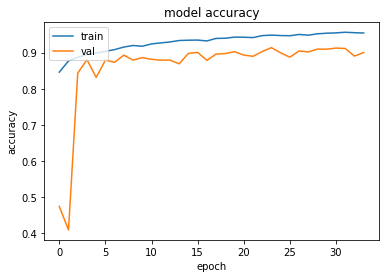

In [ ]:
 import keras
from matplotlib import pyplot as plt
history = modelfinish
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(model.history.__dict__)

{'validation_data': None, 'model': <keras.engine.functional.Functional object at 0x7f751d4b3250>, '_chief_worker_only': None, '_supports_tf_logs': False, 'history': {'loss': [0.3512990176677704, 0.29238009452819824, 0.2687315344810486, 0.2494077831506729, 0.23847797513008118, 0.22872169315814972, 0.2166603058576584, 0.20117290318012238, 0.19164301455020905, 0.19490106403827667, 0.18188521265983582, 0.17562493681907654, 0.16984030604362488, 0.16052329540252686, 0.15918205678462982, 0.15870440006256104, 0.1640283167362213, 0.14917656779289246, 0.1456969976425171, 0.1380394846200943, 0.14030791819095612, 0.14215360581874847, 0.1296500563621521, 0.12611691653728485, 0.12840667366981506, 0.12928220629692078, 0.12180006504058838, 0.12563981115818024, 0.11691172420978546, 0.11324180662631989, 0.11095815151929855, 0.10623202472925186, 0.10988906025886536, 0.11161063611507416], 'accuracy': [0.8456931114196777, 0.8769040107727051, 0.8867304921150208, 0.8949005603790283, 0.8985136151313782, 0.903

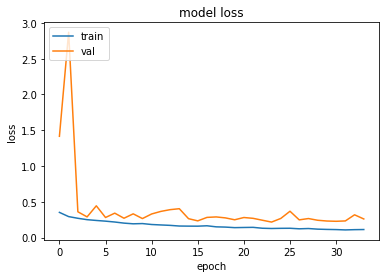

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

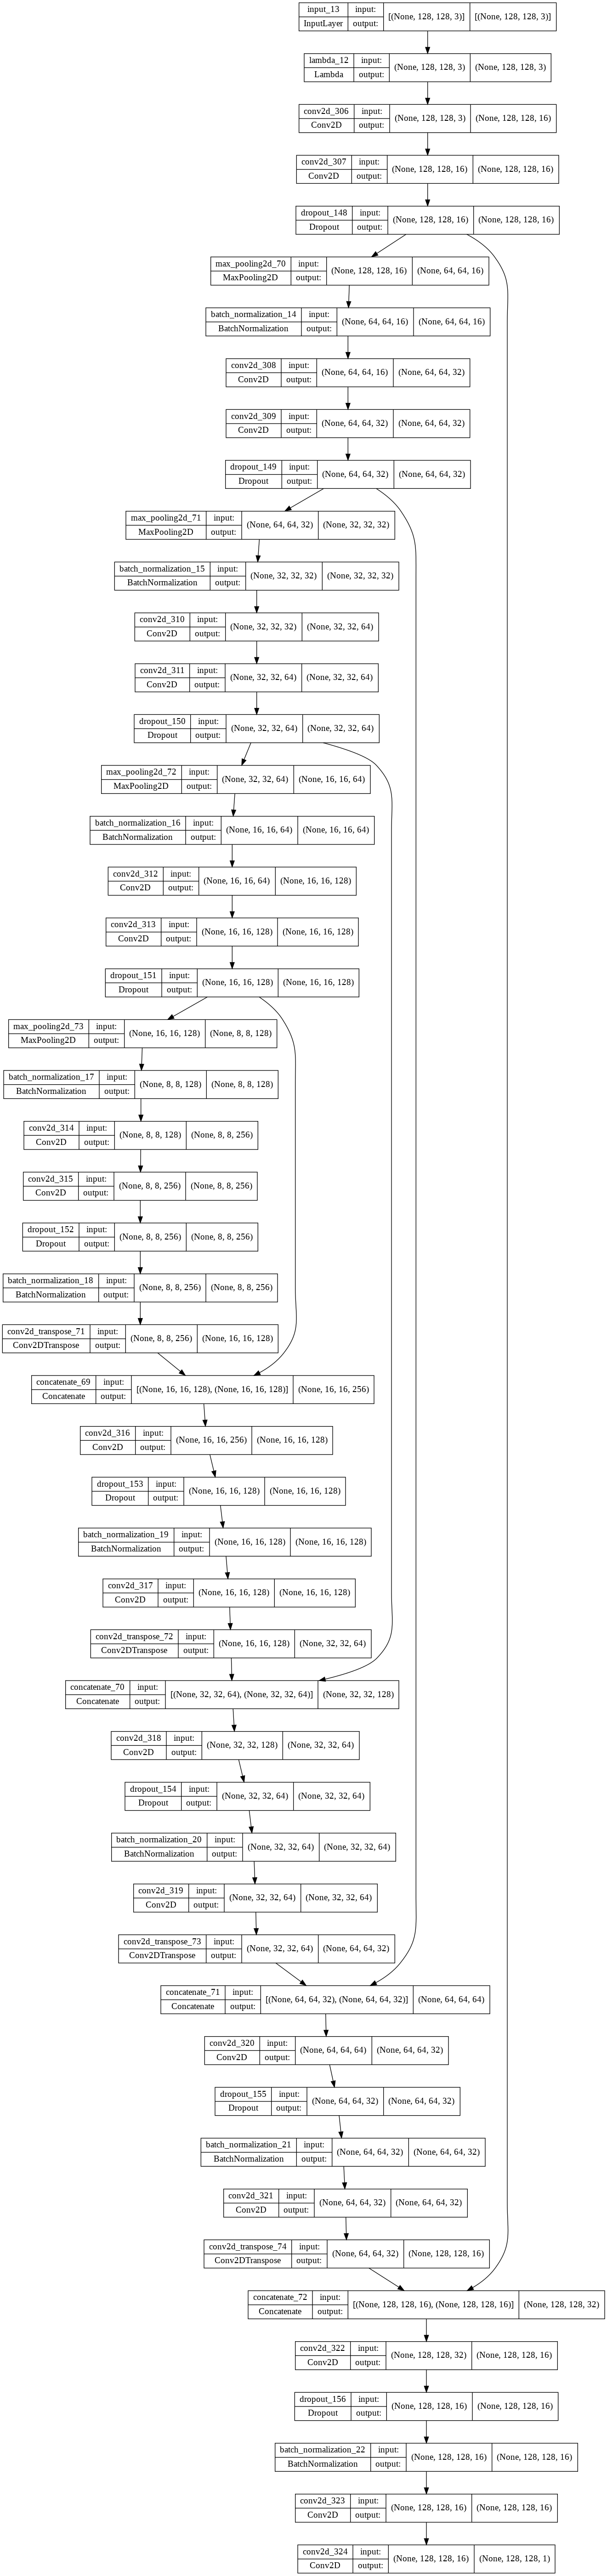

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

def recreate_image(instancelist, image_num):
  test = np.zeros((128,128), dtype=np.uint8)
  for x in range(128):
    for y in range(128):
      if instancelist[image_num][x,y] == True:
          test[x,y] = 255
      else:
          test[x,y] = 0
  return test

# testing the model after training 
# reading the image 
image_path = "/content/00160.jpg"
image_testt = imread(image_path)
# resizing the image 
image_test = resize(image_testt, (128,128), mode="constant", preserve_range = True)
print(image_test.shape)
image_x = np.zeros((1,128, 128, 3),dtype=np.uint8)
image_x[0] = image_test
print(image_test.shape)
preds_train = model.predict(image_x[:], verbose=1)

(128, 128, 3)
(128, 128, 3)
1/1 [==============================] - 0s 32ms/step


In [ ]:
preds_train_t = (preds_train > 0.5).astype(np.uint8) # 

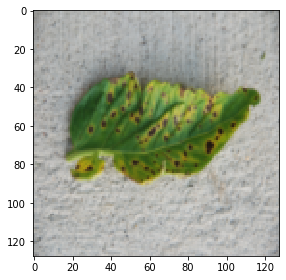

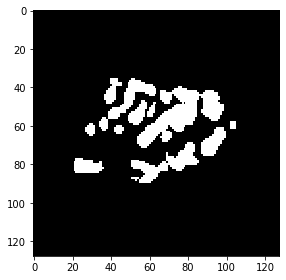

In [ ]:
image_test = resize(image_testt, (128,128))
imshow(image_test)
plt.show()
imshow(recreate_image(preds_train_t, 0))
plt.show()

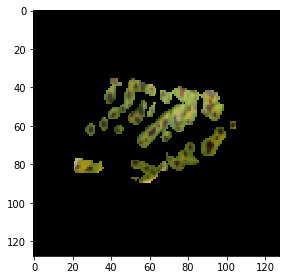

In [ ]:
# using the mask
import cv2
mask = recreate_image(preds_train_t, 0)
res = cv2.bitwise_and(image_x[0], image_x[0], mask=mask)
imshow(res)

In [ ]:
# make the mask points with a color
def get_image(instancelist, image_num, image=None):
  image = resize(image, (128,128), mode="constant", preserve_range = True)
  test = np.zeros((128,128,3), dtype=np.uint8)
  for x in range(128):
    for y in range(128):
      if instancelist[image_num][x,y] > 0:
          test[x,y] = (255,0,0) # green (0,255,0)
      else:
          test[x,y] = image[x,y]
  return test

Text(0.5, 1.0, 'After')

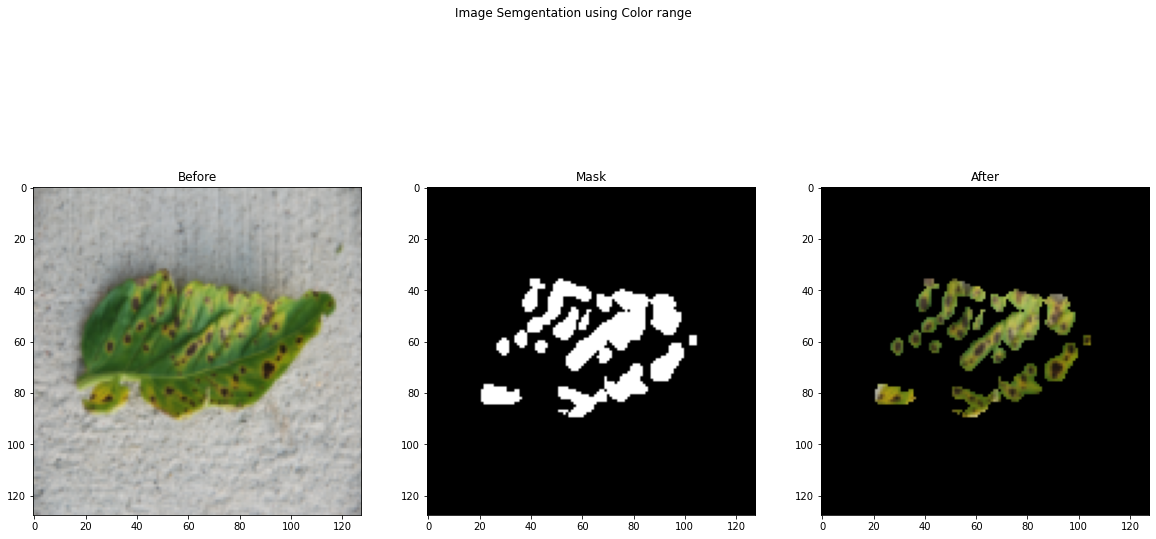

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Image Semgentation using Color range")
fig.add_subplot(1, 3, 1)
# showing the image before range compression
plt.imshow(image_test)
plt.title("Before")
# showing the image after range compression
fig.add_subplot(1, 3, 2)
plt.imshow(recreate_image(preds_train_t, 0), cmap="gray")
plt.title("Mask")
fig.add_subplot(1, 3, 3)
plt.imshow(res)#get_image(preds_train_t, 0, image_testt)
plt.title("After")

In [ ]:
# --------------------------------------
# OUTPUT 19/07/2021: 3.7.11
# --------------------------------------
import sys
print(sys.version)
# ----------------------[alternative]---
!python --version  # checks version from command line

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Python 3.7.13
